<a href="https://colab.research.google.com/github/j82887/1st-DL-CVMarathon/blob/master/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

資料的大小： (150, 4)
特徵名稱： ['setosa' 'versicolor' 'virginica']
標籤數量: {0: 50, 1: 50, 2: 50}
資料的大小： (100, 4)
特徵名稱： ['setosa' 'versicolor']
標籤數量: {0: 50, 1: 50}
混淆矩陣：
 [[25  0  0]
 [ 0 20  2]
 [ 0  2 26]]
準確度：
 0.9466666666666667
混淆矩陣：
 [[25  0]
 [ 0 25]]
準確度：
 1.0


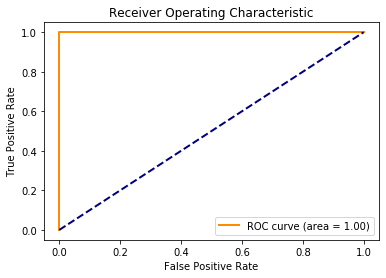

In [48]:
from sklearn.datasets import load_iris  #匯入資料集iris 
import numpy as np
from sklearn.linear_model import LogisticRegression #匯入模型
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix #驗證指標
from sklearn.model_selection import train_test_split #分割訓練集與測試集
import matplotlib.pyplot as plt

#====================== 資料集(三分類) ===========================

#載入資料集  
iris = load_iris()  
data = iris.data
label = iris.target
name = iris.target_names

#打印資料集  
print("資料的大小：",data.shape)
print("特徵名稱：",name)

#計算標籤數量
unique, counts = np.unique(label, return_counts=True)
print("標籤數量:",dict(zip(unique, counts)))

#分割訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.5)

#====================== 資料集(二分類) ===========================

#刪除label為2的資料
location_label_2 = []
for i in range(len(data)):
  if(label[i]==2):
    location_label_2.append(i)

data_2 = np.delete(data, location_label_2, axis=0) 
label_2 = np.delete(label, location_label_2, axis=0) 
name_2 = np.array(['setosa','versicolor'])

#打印資料集  
print("資料的大小：",data_2.shape)
print("特徵名稱：",name_2)

#計算標籤數量
unique, counts = np.unique(label_2, return_counts=True)
print("標籤數量:",dict(zip(unique, counts)))

#分割訓練集與測試集
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(data_2, label_2, test_size=0.5)

#====================== 模型訓練(三分類) ===========================

#模型建立
model = LogisticRegression(C=1, random_state=0)

#模型訓練
model.fit(X_train, y_train)

#預測
predict = model.predict(X_test) 
predict_proba = model.predict_proba(X_test)

#====================== 模型驗證(三分類) ===========================

#驗證指標
print("混淆矩陣：\n",confusion_matrix(y_test, predict))
print("準確度：\n",accuracy_score(y_test, predict))

#====================== 模型訓練(二分類) ===========================

#模型建立
model_2 = LogisticRegression(C=1, random_state=0)

#模型訓練
model_2.fit(X_train_2, y_train_2)

#預測
predict_2 = model_2.predict(X_test_2) 
predict_proba_2 = model_2.predict_proba(X_test_2)

#====================== 模型驗證(三分類) ===========================

#驗證指標
print("混淆矩陣：\n",confusion_matrix(y_test_2, predict_2))
print("準確度：\n",accuracy_score(y_test_2, predict_2))

#ROC曲線計算切點、fpr、tpr與曲線下面積
fpr, tpr, thresholds = roc_curve(y_test_2, predict_proba_2[:,1])
roc_auc = auc(fpr, tpr)

#繪製ROC曲線與曲面下面積
plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()